## Notebook To Display Interactive Time Series for CO2 Data
Elena Reinisch, 2018-09-11

Last modified: 2018-09-14

## Load Libraries and Data

In [1]:
# start with same libraries as vector tutorial
%matplotlib inline

from __future__ import (absolute_import, division, print_function)
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from folium.plugins import TimeSliderChoropleth
import numpy as np

from shapely.geometry import Point
from shapely.geometry import Polygon
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

/root/miniconda/envs/vectorenv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
%run -i load_data.py

## View Data

In [3]:
co2_data_table.head()

,Reference,Site Type,Latitude,Longitude,DateTime,Altitude,Discharge,Stream Slope,Width,Depth,...,Air Temperature,DO,Chl a,CO2,k,k600,CO2 Flux,CO2 Flux.1,Source,geometry
0,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-18.104,1381.28,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
1,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-18.320,1267.75,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
2,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-35.512,1449.39,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
3,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-20.488,1025.55,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
4,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-22.272,1411.55,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)


We get a first look at how many unique sites we have.

In [4]:
len(co2_geo_data_table.Latitude.unique())

1352

Now we determine which flux column to take based on the number of measurements.

In [5]:
len(co2_geo_data_table[co2_geo_data_table['CO2 Flux'].isna()])

4033

In [6]:
len(co2_geo_data_table[co2_geo_data_table['CO2 Flux.1'].isna()])

4437

Because there are more records of CO2 Flux.1, we use these values for CO2 flux.

## Plot Static World Map

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...


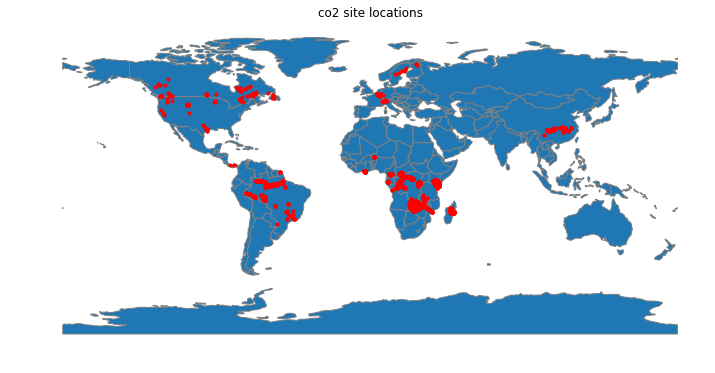

In [8]:
f, ax = plt.subplots(1, figsize=(12, 6))
ax.set_title('co2 site locations')
world.plot(ax=ax, edgecolor='gray')
co2_geo_data_table.plot(ax=ax, marker='.', color='r')
ax.set_ylim([-90, 90])
ax.set_axis_off()
plt.axis('equal');

## Plot Values for North America in Interactive Map

### Initialize new figure

In [9]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### Pull Data from N. America

In [10]:
NA_co2_geo_data_table = co2_geo_data_table[co2_geo_data_table.Latitude.between(23, 90) & co2_geo_data_table.Longitude.between(-131, -68)] 

In [11]:
NA_co2_geo_data_table.describe()

,Latitude,Longitude,Altitude,Discharge,Stream Slope,Width,Depth,Flow Velocity,Wind Speed,POC,...,pH,Water Temperature,Air Temperature,DO,Chl a,CO2,k,k600,CO2 Flux,CO2 Flux.1
count,110.000000,110.000000,30.000000,0.0,0.0,40.000000,40.000000,0.0,0.0,2.000000,...,30.000000,30.000000,0.0,0.0,0.0,47.000000,0.0,0.0,0.0,62.000000
mean,46.024807,-97.801554,2342.866667,NaN,NaN,19.297250,0.766750,NaN,NaN,1.350000,...,7.683333,9.448667,NaN,NaN,NaN,1063.165957,NaN,NaN,NaN,315.764516
std,7.308169,17.756859,696.002563,NaN,NaN,65.361477,2.443879,NaN,NaN,0.494975,...,0.360262,2.970441,NaN,NaN,NaN,1265.263493,NaN,NaN,NaN,373.343924
min,28.878333,-126.000000,1211.000000,NaN,NaN,1.500000,0.030000,NaN,NaN,1.000000,...,6.630000,6.230000,NaN,NaN,NaN,186.000000,NaN,NaN,NaN,-325.900000
25%,44.336180,-107.147989,1660.750000,NaN,NaN,5.677500,0.070000,NaN,NaN,1.175000,...,7.522500,7.187500,NaN,NaN,NaN,318.500000,NaN,NaN,NaN,120.850000
50%,46.600000,-101.933334,2629.000000,NaN,NaN,6.540000,0.145000,NaN,NaN,1.350000,...,7.715000,7.695000,NaN,NaN,NaN,542.000000,NaN,NaN,NaN,318.950000
75%,50.300000,-77.000000,2863.500000,NaN,NaN,10.155000,0.555000,NaN,NaN,1.525000,...,7.922500,11.460000,NaN,NaN,NaN,960.000000,NaN,NaN,NaN,462.625000
max,59.600000,-68.400000,3311.000000,NaN,NaN,420.000000,15.500000,NaN,NaN,1.700000,...,8.170000,15.610000,NaN,NaN,NaN,6277.000000,NaN,NaN,NaN,1569.300000


### Plot Points with Labels of Reference and Site Type

In [12]:
firstmap = folium.Map(location=[39.8283, -98.5795], tiles='Stamen Terrain', zoom_start=4)
for index, row in NA_co2_geo_data_table.iterrows():
    iconcolor='blue'
    if pd.isnull(row['CO2']): # no CO2 values
        if pd.isnull(row['CO2 Flux.1']): # no CO2 values and no flux values
            iconcolor = 'red'
            marker = folium.Marker((row['Latitude'],row['Longitude']), popup="{}: no CO2 values".format(row['Site Type']),
                                  icon=folium.Icon(color=iconcolor, icon='warning-sign'))
            marker.add_to(firstmap)
        else:
            iconcolor = 'blue'
            marker = folium.Marker((row['Latitude'],row['Longitude']), popup="{}: CO2 flux =\n {} mg C m-2 d-1".format(row['Site Type'], row['CO2 Flux.1']),
                                  icon=folium.Icon(color=iconcolor, icon='info-sign'))
            marker.add_to(firstmap)
    else: # CO2 values
        if pd.isnull(row['CO2 Flux.1']): # CO2 values but no flux values
            iconcolor = 'purple'
            marker = folium.Marker((row['Latitude'],row['Longitude']), popup="{}: CO2 =\n {} micro-atm".format(row['Site Type'], row['CO2']),
                                  icon=folium.Icon(color=iconcolor, icon='info-sign'))
            marker.add_to(firstmap)
        else:
            iconcolor = 'green' # both CO2 values and flux values
            marker = folium.Marker((row['Latitude'],row['Longitude']), popup="{}: \n CO2 = {} micro-atm \n CO2 flux = {} mg C m-2 d-1".format(row['Site Type'], row['CO2'], row['CO2 Flux.1']),
                                  icon=folium.Icon(color=iconcolor, icon='info-sign'))
            marker.add_to(firstmap)

### Visualize Map

In [13]:
firstmap

## Plot Interactive Time Series

Our goal is to create an interactive time series map showing locations of records over time.  To do so, we will use `TimeSliderChoropleth` available from `folium.plugins`.  In order to do so, we will first need to clean our time data.  Some of the data is available in 'YYYYMMDD' format, while others are given in year only, and still others are in a format that is unrecognizable.  We will work with the 'YYYYMMDD' and 'YYYY' data, but first we need to get this data into a single format.  We choose 'YYYYMMDD'.

### Clean Up DateTime Records

First, we look at all of the available data with date values.

In [14]:
co2_geo_data_table = co2_geo_data_table.copy()

In [15]:
co2_geo_data_table = co2_geo_data_table[~co2_geo_data_table['CO2'].isna()]

The dates are in different formats.  While some dates are not identifiable, we can determine that some dates are year-only.  To be able to incoporate these into our data set, we will adjust these dates to read as YYYYMMDD.  We first create a new column called 'ModifiedDateTime' which contains the values of 'DateTime' converted to float64.

In [16]:
co2_geo_data_table['ModifiedDateTime'] = pd.Series(pd.to_numeric(co2_geo_data_table['DateTime'], errors='coerce'), dtype='int64')

In [17]:
co2_geo_data_table.ModifiedDateTime.fillna(0);

Now we take all the values that were recorded by year-only and convert them to 'YYYYMMDD' by multiplying by 1e4.  

In [18]:
co2_geo_data_table.loc[co2_geo_data_table['ModifiedDateTime'] < 3000, 'ModifiedDateTime'] = co2_geo_data_table[co2_geo_data_table['ModifiedDateTime'] < 3000].ModifiedDateTime*1e4+101

We confirm that the values were changed correctly.

In [19]:
co2_geo_data_table[co2_geo_data_table['ModifiedDateTime'] < 3000].ModifiedDateTime

Series([], Name: ModifiedDateTime, dtype: float64)

This means that there are no longer any values below 3000 (e.g., 2012).  We confirm the minimum of the data set to be from the unrecognized date format.

In [20]:
co2_geo_data_table[co2_geo_data_table['ModifiedDateTime'] < 50000].ModifiedDateTime.min()

39112.0

Lastly, we check that 2012 was correctly incorporated.

In [21]:
co2_geo_data_table[co2_geo_data_table['ModifiedDateTime'] > 20110000].ModifiedDateTime.min()

20120101.0

### Test Data Set

We can now isolate a subset of usable data to perform plot as an interactive time series using `TimeSliderChoropleth`.  For a great example of how to use `TimeSliderChoropleth`, please see [this example](http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/TimeSliderChoropleth.ipynb).  For this demonstration, we use data between 2004 and 2006.

In [22]:
co2_geo_data_table_TS_subset = co2_geo_data_table[(co2_geo_data_table['ModifiedDateTime'] > 20010000) & (co2_geo_data_table['ModifiedDateTime'] < 20060000)]

In [23]:
co2_geo_data_table_TS_subset = co2_geo_data_table_TS_subset.copy()

We convert the dates in 'ModifiedDateTime' to DateTime values in order to operate on years.

In [24]:
co2_geo_data_table_TS_subset['ModifiedDateTime'] = pd.to_datetime(co2_geo_data_table_TS_subset['ModifiedDateTime'].astype('int64').astype('str'), yearfirst=True)

In [25]:
co2_geo_data_table_TS_subset.ModifiedDateTime.head()

0   2004-07-01
1   2004-07-01
2   2004-07-01
3   2004-07-01
4   2004-07-01
Name: ModifiedDateTime, dtype: datetime64[ns]

We now build a dictionary which references our date values using DateTime indices.

In [26]:
datetime_index = pd.DatetimeIndex(co2_geo_data_table_TS_subset['ModifiedDateTime'])
dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = dt_index_epochs.astype('U10')

dt_index

Index(['1088640000', '1088640000', '1088640000', '1088640000', '1088640000',
       '1088726400', '1088726400', '1088726400', '1088726400', '1088726400',
       ...
       '1125360000', '1125360000', '1125446400', '1125446400', '1125446400',
       '1125446400', '1125792000', '1125792000', '1125792000', '1125792000'],
      dtype='object', name='ModifiedDateTime', length=237)

In [27]:
datetime_index

DatetimeIndex(['2004-07-01', '2004-07-01', '2004-07-01', '2004-07-01',
               '2004-07-01', '2004-07-02', '2004-07-02', '2004-07-02',
               '2004-07-02', '2004-07-02',
               ...
               '2005-08-30', '2005-08-30', '2005-08-31', '2005-08-31',
               '2005-08-31', '2005-08-31', '2005-09-04', '2005-09-04',
               '2005-09-04', '2005-09-04'],
              dtype='datetime64[ns]', name='ModifiedDateTime', length=237, freq=None)

Next, we build the base for a style dictionary that will change the color of our plotted records based on the level of CO2 concentration at a particular time.  If there are no measurements for a pariticular date, then the opacity is set to zero.

Something that I found was that `TimeSliderChoropleth` seems to rely on having regions rather than points to display the changes over time.  I thus represent our data points as polygons rather than points (as recorded) in this plot.

In [28]:
styledata = {}
n_periods = len(dt_index)
n_sample = len(dt_index)
record_index = 0

for record in co2_geo_data_table_TS_subset.index:
    co2_geo_data_table_TS_subset.geometry.at[record] = Polygon(((co2_geo_data_table_TS_subset.loc[record].Longitude, co2_data_table.loc[record].Latitude),
                                                                (co2_geo_data_table_TS_subset.loc[record].Longitude, co2_data_table.loc[record].Latitude+1),
                                                                (co2_geo_data_table_TS_subset.loc[record].Longitude+1, co2_data_table.loc[record].Latitude+1),
                                                                (co2_geo_data_table_TS_subset.loc[record].Longitude+1, co2_data_table.loc[record].Latitude),
                                                                (co2_geo_data_table_TS_subset.loc[record].Longitude, co2_data_table.loc[record].Latitude)))
    df = pd.DataFrame(
         {'color': co2_geo_data_table_TS_subset.CO2.get_values(),
          'opacity': 0*np.random.normal(size=n_periods)},
         index=dt_index)
    df = df.cumsum()
    df.sample(n_sample, replace=False).sort_index()
    df.loc[df.index == dt_index[record_index], 'opacity'] = np.ones(len(df.index[df.index == dt_index[record_index]]))#co2_geo_data_table_TS_subset[df.index == dt_index[record]].CO2.get_values()
    styledata[record_index] = df
    record_index += 1


In [29]:
styledata.get(0).head()

,color,opacity
ModifiedDateTime,,
1088640000,140.5,1.0
1088640000,281.0,1.0
1088640000,421.5,1.0
1088640000,562.0,1.0
1088640000,702.5,1.0


We now map the colors to a predefined color map.  Since the opacity values are set to be 0 or 1, they do not need to be scaled.

In [30]:
from branca.colormap import linear

max_color, min_color = 0, 0

for ModifiedDateTime, data in styledata.items():
    max_color = max(max_color, data['color'].max())
    min_color = min(min_color, data['color'].min())
        
cmap = linear.BuPu_09.scale(min_color, max_color)

for country, data in styledata.items():
    data['color'] = data['color'].apply(cmap)
    data['opacity'] = (data['opacity'])
    data['opacity'] = (data['opacity'])

In [31]:
styledata.get(0).head()

,color,opacity
ModifiedDateTime,,
1088640000,#f7fcfd,1.0
1088640000,#f7fcfd,1.0
1088640000,#f7fcfd,1.0
1088640000,#f7fcfd,1.0
1088640000,#f7fcfd,1.0


Now we can place the style data in dictionary format.

In [32]:
styledict = {
    str(record): data.to_dict(orient='index') for
    record, data in styledata.items()
}

Our last step before plotting is to set the 'ModifiedDateTime' values to string so that we can convert to JSON format.

In [33]:
co2_geo_data_table_TS_subset['ModifiedDateTime'] = co2_geo_data_table_TS_subset['ModifiedDateTime'].astype('str') 

### Map Showing Levels of CO2 Concentration Measured at Different Locations Over Time

We use `TimeSliderChoropleth` to map the locations of measured CO2 concentration over time for our data subset.  Colors correspond to levels of CO2 concentration.  

It turns out that `TimeSliderChoropleth` does not have a straightforward way to get a legend for your plot.  To get around this, I added a choropleth layer with point color and opacity set to zero to build the legend. 

In [34]:
m = folium.Map([-10, -55], zoom_start=5)

g = TimeSliderChoropleth(
    co2_geo_data_table_TS_subset.to_json(),
    styledict=styledict, overlay = True
).add_to(m)

m.choropleth(
    geo_data=co2_geo_data_table_TS_subset.to_json(),
    data=co2_geo_data_table_TS_subset,
    columns=['ModifiedDateTime', 'CO2'],
    key_on='feature.id',
    fill_color= 'BuPu',
    fill_opacity=0.0,
    line_opacity=0.0,
    legend_name='CO2 (micro-atm)',
#    reset=True
)
folium.LayerControl().add_to(m)
m.save('TimeSeries_CO2_2004to2006.html')
m